In [86]:
# Importing the dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor

{}

In [88]:
#Loading the data from csv file to panda dataframe
cars_data = pd.read_csv('/content/Dataset_with_USD_Prices_Only.csv')

In [89]:
#Inspecting the first 5 rows of the daraframe
cars_data.head()

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price_USD,Present_Price_USD
0,ritz,2014,27000,Petrol,Dealer,Manual,1,4036.144578,6734.939759
1,sx4,2013,43000,Diesel,Dealer,Manual,1,5722.891566,11493.975900
2,ciaz,2017,6900,Petrol,Dealer,Manual,1,8734.939759,11867.469880
3,wagon r,2011,5200,Petrol,Dealer,Manual,1,3433.734940,5000.000000
4,swift,2014,42450,Diesel,Dealer,Manual,1,5542.168675,8277.108434


In [90]:
#Checking the number of rows and columns
cars_data.shape

(301, 9)

In [91]:
#Get information about the dataset (Null and Objects)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           301 non-null    object 
 1   Year               301 non-null    int64  
 2   Kms_Driven         301 non-null    int64  
 3   Fuel_Type          301 non-null    object 
 4   Seller_Type        301 non-null    object 
 5   Transmission       301 non-null    object 
 6   Owner              301 non-null    int64  
 7   Selling_Price_USD  301 non-null    float64
 8   Present_Price_USD  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [92]:
#Checking the number of missing values
cars_data.isnull().sum()

,0
Car_Name,0
Year,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0
Selling_Price_USD,0
Present_Price_USD,0


In [93]:
#Checking the distribution of categorical data
print(cars_data.Fuel_Type.value_counts())
print(cars_data.Seller_Type.value_counts())
print(cars_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


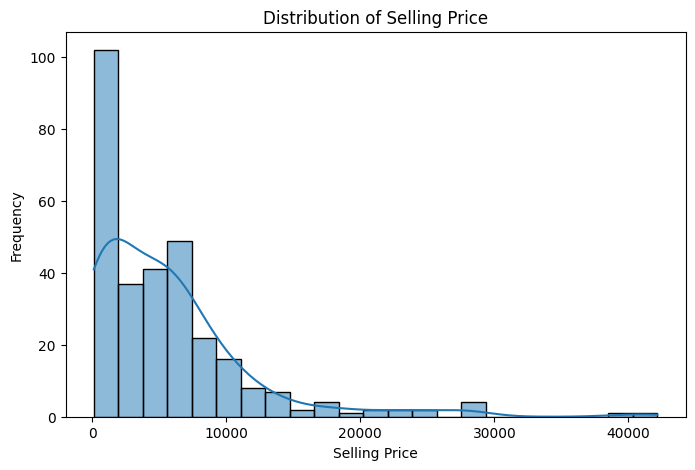

In [94]:
#Visualizing the distribution of the target variable (Selling_Price)
plt.figure(figsize=(8, 5))
sns.histplot(cars_data['Selling_Price_USD'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

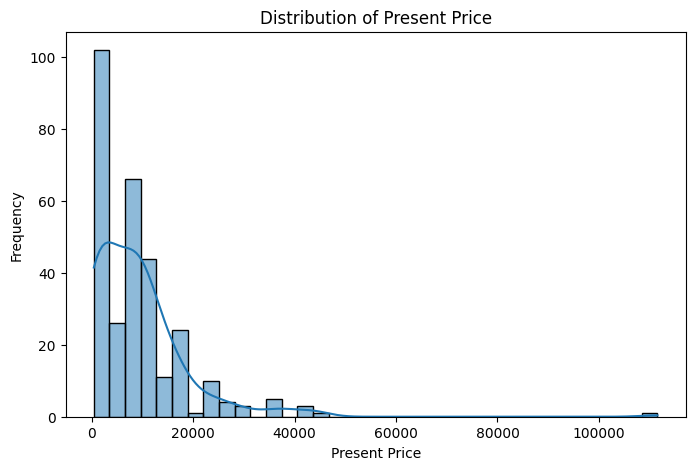

In [95]:
#Visualizing the distribution of the target variable (Present_Price)
plt.figure(figsize=(8, 5))
sns.histplot(cars_data['Present_Price_USD'], kde=True)
plt.title('Distribution of Present Price')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.show()


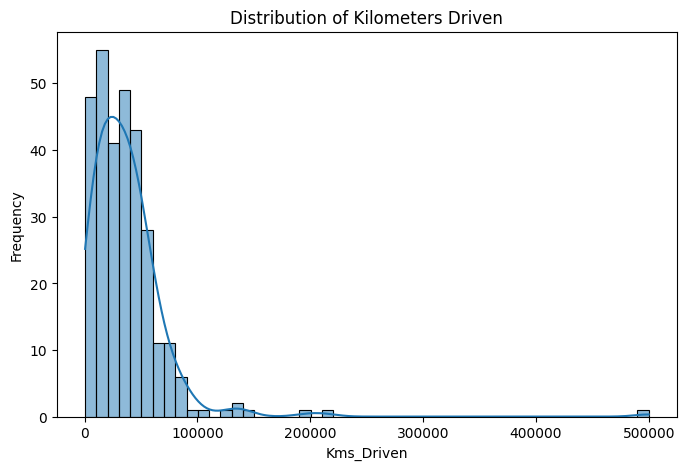

In [96]:
#Visualizing the distribution of the target variable (Kms_Driven)
plt.figure(figsize=(8, 5))
sns.histplot(cars_data['Kms_Driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kms_Driven')
plt.ylabel('Frequency')
plt.show()


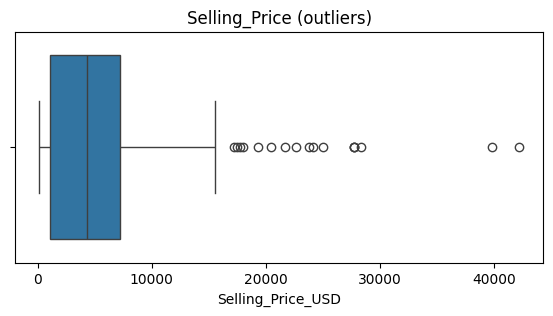

In [97]:
fig = plt.figure(figsize=[15,3])
plt.subplot(1,2,1)
sns.boxplot(x="Selling_Price_USD",data=cars_data)
plt.title("Selling_Price (outliers)")
plt.show()

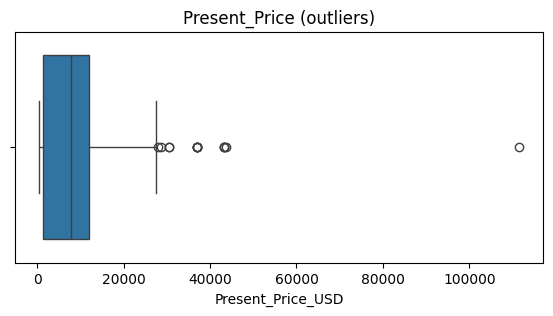

In [98]:
fig = plt.figure(figsize=[15,3])
plt.subplot(1,2,1)
sns.boxplot(x="Present_Price_USD",data=cars_data)
plt.title("Present_Price (outliers)")
plt.show()

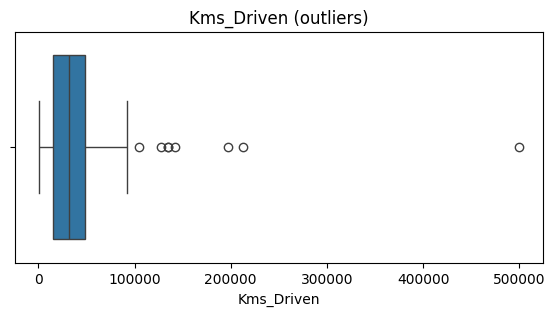

In [99]:
fig = plt.figure(figsize=[15,3])
plt.subplot(1,2,1)
sns.boxplot(x="Kms_Driven",data=cars_data)
plt.title("Kms_Driven (outliers)")
plt.show()

In [100]:
#One hot encoding for categorical features
cars_data = pd.get_dummies(cars_data, columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [101]:
#Checking if the encoding is done properly (First 5 rows)
cars_data.head()

,Car_Name,Year,Kms_Driven,Owner,Selling_Price_USD,Present_Price_USD,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,27000,1,4036.144578,6734.939759,False,True,False,True
1,sx4,2013,43000,1,5722.891566,11493.975900,True,False,False,True
2,ciaz,2017,6900,1,8734.939759,11867.469880,False,True,False,True
3,wagon r,2011,5200,1,3433.734940,5000.000000,False,True,False,True
4,swift,2014,42450,1,5542.168675,8277.108434,True,False,False,True


In [102]:
#Splitting the data into X and Y
X=cars_data.drop(['Car_Name','Selling_Price_USD'],axis=1)
y=cars_data['Selling_Price_USD']

In [103]:
X.head()

,Year,Kms_Driven,Owner,Present_Price_USD,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,27000,1,6734.939759,False,True,False,True
1,2013,43000,1,11493.975900,True,False,False,True
2,2017,6900,1,11867.469880,False,True,False,True
3,2011,5200,1,5000.000000,False,True,False,True
4,2014,42450,1,8277.108434,True,False,False,True


In [104]:
y.head()

,Selling_Price_USD
0,4036.144578
1,5722.891566
2,8734.939759
3,3433.734940
4,5542.168675


In [105]:
#Training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

In [106]:
# Scale only numerical features
scaler = StandardScaler()
num_cols = ['Kms_Driven', 'Present_Price_USD','Owner']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [107]:
X_train[num_cols].head()


,Kms_Driven,Present_Price_USD,Owner
204,-0.238447,-0.378559,-0.185695
249,-0.517769,-0.022761,-0.185695
277,-0.399425,0.650673,-0.185695
194,0.299252,-0.787446,-0.185695
244,0.274494,0.179269,-0.185695


In [108]:
#Loading the linear regression model
lre = LinearRegression()

In [109]:
lre.fit(X_train,y_train)

LinearRegression()

In [110]:
#Initialize and train the XGBoost regression model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [111]:
#Initialize and train the Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
#Prediction on training data
y_pred = lre.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [113]:
#Evaluating the model
def evaluate_model(name,y_true,y_pred):
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  print(f"{name}:")
  print(f"Mean Squared Error: {mse:.2f}")
  print(f"R2 Score: {r2:.4f}\n")

In [114]:
evaluate_model("XGBoost Regression",y_test,y_pred_xgb)
evaluate_model("Random Forest Regression",y_test,y_pred_rf)

XGBoost Regression:
Mean Squared Error: 390739.82
R2 Score: 0.9795

Random Forest Regression:
Mean Squared Error: 373200.90
R2 Score: 0.9805



In [115]:
from logging import error
#MSE and R squared Error
mse_score=metrics.mean_squared_error(y_train, y_pred)
r2_score=metrics.r2_score(y_train, y_pred)

In [116]:
#Printing the MSE and R squared Error
print(f"MSE Score: {mse_score:3f}")
print(f"R2 Score: {r2_score:.3f}")

MSE Score: 4687543.522561
R2 Score: 0.881


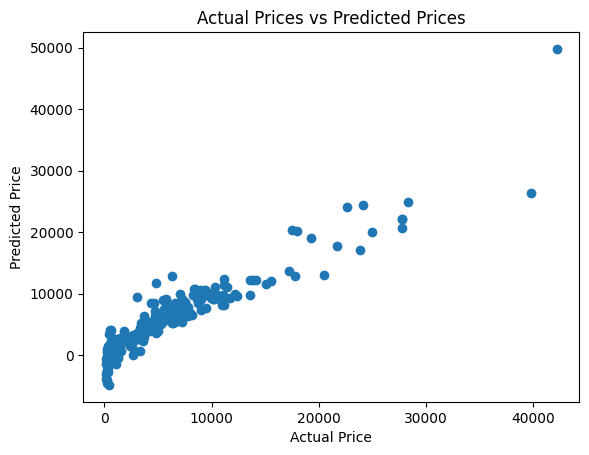

In [117]:
#Visualize the actual prices and the predicted prices
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [118]:
import pickle as pk

In [119]:
pk.dump(rf_model,open('model-2.pkl','wb'))
# Save scaler after training
pk.dump(scaler, open('scaler.pkl', 'wb'))


In [120]:
!pip install streamlit pyngrok


In [121]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
from PIL import Image
import altair as alt

# Page Config
st.set_page_config(page_title="Used Car Price Predictor", page_icon="🚗", layout="wide")

# Load model and scaler
with open("model-2.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("logistic_model.pkl", "rb") as lmodel_file:
    lmodel = pickle.load(lmodel_file)

with open("scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

# Title and Header Section
st.title("🚗 Used Car Price Prediction App")
st.markdown("""
<style>
    .stApp {
        background-color: #121212;
        color: #e0e0e0;
    }
    h1 {
        color: #f1c40f;
        text-align: center;
    }
    .css-18e3th9 {
        background-color: #1e1e1e !important;
    }
    .css-1d391kg {
        color: #e0e0e0;
    }
</style>
""", unsafe_allow_html=True)

image = Image.open("/content/car-price-preditcion-image.png")
st.image(image, use_container_width=True)

st.markdown("""
Welcome to the **Used Car Price Predictor**. Fill in the details below to get an estimated selling price and price category for your car.
""")

st.sidebar.header("Enter Car Details")

# Sidebar Inputs
present_price = st.sidebar.slider("Original Price (USD)", min_value=2000.0, max_value=50000.0, value=10000.0, step=500.0)
year = st.sidebar.selectbox("Model Year", list(range(2003, 2017))[::-1])
kms_driven = st.sidebar.slider("Kilometers Driven", min_value=500, max_value=250000, value=30000, step=1000)
owner = st.sidebar.selectbox("Number of Previous Owners", [1, 2])
fuel_type = st.sidebar.radio("Fuel Type", ["Petrol", "Diesel", "Electric"])
seller_type = st.sidebar.radio("Seller Type", ["Dealer", "Individual"])
transmission = st.sidebar.radio("Transmission", ["Manual", "Automatic"])

# Display Feature Overview
st.subheader("🔍 Feature Overview")

features = {
    "Original Price (USD)": present_price,
    "Model Year": year,
    "Kilometers Driven": kms_driven
}

cols = st.columns(len(features))
for col, (label, value) in zip(cols, features.items()):
    chart_df = pd.DataFrame({"Feature": [label], "Value": [value]})
    bar = alt.Chart(chart_df).mark_bar(size=60, color="#f1c40f").encode(
        x=alt.X("Feature:N", axis=alt.Axis(labelAngle=0)),
        y="Value:Q",
        tooltip=["Value"]
    ).properties(height=200)
    col.altair_chart(bar, use_container_width=True)

# Show Summary of Inputs
st.subheader("📟 Summary of Selections")
st.markdown(f"""
- **Fuel Type:** {fuel_type}
- **Seller Type:** {seller_type}
- **Transmission:** {transmission}
- **Previous Owners:** {owner}
""")

# Encoding
fuel_diesel = 1 if fuel_type == "Diesel" else 0
fuel_petrol = 1 if fuel_type == "Petrol" else 0
seller_individual = 1 if seller_type == "Individual" else 0
transmission_manual = 1 if transmission == "Manual" else 0

input_data = pd.DataFrame([{
    'Year': year,
    'Kms_Driven': kms_driven,
    'Owner': owner,
    'Present_Price_USD': present_price,
    'Fuel_Type_Diesel': fuel_diesel,
    'Fuel_Type_Petrol': fuel_petrol,
    'Seller_Type_Individual': seller_individual,
    'Transmission_Manual': transmission_manual
}])

# Scaling
numeric_cols = ['Kms_Driven', 'Present_Price_USD', 'Owner']
input_data[numeric_cols] = scaler.transform(input_data[numeric_cols])

# Prediction Buttons
col1, col2 = st.columns(2)
with col1:
    if st.button("Predict Price"):
        try:
            prediction = model.predict(input_data)[0]
            st.success("\U0001F4B0 Estimated Selling Price: **${:,.2f}**".format(prediction))
        except Exception as e:
            st.error("❌ Prediction failed: {}".format(str(e)))

with col2:
    if st.button("Predict Price Category"):
        try:
            prediction = lmodel.predict(input_data)
            st.success("🏋️‍♂️ Price Category: **{}**".format(prediction[0]))
        except Exception as e:
            st.error("❌ Category prediction failed: {}".format(str(e)))



Overwriting app.py


In [122]:
!rm -rf ~/.ngrok2
!pip install --upgrade pyngrok


In [127]:
# Then run Streamlit and ngrok properly
from pyngrok import ngrok
import time


ngrok.set_auth_token("2yigaDVr5HIypRUjV8tIXgfQKCF_4NYQ9rvVWnqNKXi7Ki44d")
# Kill old processes
!pkill -f streamlit
ngrok.kill()

# Start Streamlit
!streamlit run app.py &> streamlit_log.txt &

# Wait for startup
time.sleep(5)

# Connect ngrok
public_url = ngrok.connect(8501)
print("🌐 Public URL:", public_url)

# Show logs if needed


🌐 Public URL: NgrokTunnel: "https://0dbe-35-234-37-247.ngrok-free.app" -> "http://localhost:8501"
